Ideas on how to create large worlds
- Generated areas as needed, then apply changes to the world


Generation methods:
- use hashing + seed to 


In [274]:
import random
%config Completer.use_jedi = False

In [275]:
def render_image(data):
    plt.figure(figsize=(10, 10))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [1]:
import pygame

pygame 2.0.1 (SDL 2.0.14, Python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
32//16

2

In [31]:
pygame.init()
display_surf = pygame.display.set_mode((500,500))

In [70]:
def to_pygame(p, surface):
    """Convenience method to convert pymunk coordinates to pygame surface
    local coordinates.

    Note that in case positive_y_is_up is False, this function wont actually do
    anything except converting the point to integers.
    """

    return int(p[0]), surface.get_height() - int(p[1])


In [78]:
display_surf.fill((20, 20, 80))
tile_size = 24
image_width = tile_size*4
image_height = tile_size*5

center_pos = (125,250)

tile_image = pygame.Surface((tile_size,tile_size))
pygame.draw.rect(tile_image, 
            (0,250,250), 
            pygame.Rect(0,0,tile_size,tile_size),)
pygame.draw.rect(tile_image, 
            (30,30,50), 
            pygame.Rect(1,1,tile_size-2,tile_size-2))
pygame.draw.rect(tile_image, 
            (255,30,50), 
            pygame.Rect(tile_size/2,tile_size/2,1,1))

tile_image2 = pygame.Surface((tile_size,tile_size))
pygame.draw.rect(tile_image2, 
            (0,0,250), 
            pygame.Rect(0,0,tile_size,tile_size),)
pygame.draw.rect(tile_image2, 
            (255,255,50), 
            pygame.Rect(tile_size/2,tile_size/2,1,1))


image_twidth = image_width//tile_size
image_theight = image_height//tile_size
tmp_surf = pygame.Surface((image_width,image_height))

for x in range(0,image_twidth):
    for y in range(0,image_theight):
        tile_pos = (x * tile_size,y * tile_size)
        if x == 1 and y == 3:
            tmp_surf.blit(tile_image2,tile_pos)
        else:
            tmp_surf.blit(tile_image,tile_pos)
        


draw_pos = center_pos[0] - image_width/2, center_pos[1] - image_height/2
display_surf.blit(tmp_surf,draw_pos)


# Center Marker
pygame.draw.rect(display_surf, 
            (255,255,255), 
            pygame.Rect(center_pos[0]-2,center_pos[1]-2,5,5))

pygame.draw.rect(display_surf, 
            (0,0,0), 
            pygame.Rect(center_pos[0],center_pos[1],1,1))
pygame.display.flip()

In [2]:
import random

In [3]:
import numpy as np

In [4]:
def clip(v,mmin,mmax):
    return min(mmax-1,max(mmin,v))

In [5]:
def in_range(v,mmin,mmax):
    return v>mmin and v<(mmax-1)

In [106]:
import hashlib

In [163]:
%%timeit -n 2
for i in range(1,100000):
    random.seed(i)
    random.randint(0,172837)

575 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [29]:
type_tree={
    'physical_object': None,
    'collectable': None,
    'plant': ['physical_object'],
    'tree': ['plant'],
    'bush':['plant'],
    'bush':['plant'],
}


            
        
    

In [33]:
{123,123}

{123}

In [30]:
get_types('xxx')

{'xxx'}

In [16]:
class TestClass:
    
    def __init__(self):
        self.stuff = 50
        self.stuff1 = 50
        self.stuff2 = 50
        self.stuff3 = 50
        self.stuff4 = 50
        self.stuff5 = 50
        self.stuff6 = 50
        

In [ ]:
x.update()

In [18]:
%%timeit -n 2
for i in range(1,1000):
    TestClass()

673 µs ± 111 µs per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [21]:
TestClass().__class__.__bases__

(object,)

In [14]:
%%timeit -n 2
for i in range(1,1000000):
    x =50

17.5 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [150]:
v = 123173234343234
h = hashlib.sha1()
# v = f"{v}""
h.update(str.encode(f"{v}"))
int(h.hexdigest(),16) % 172837

150582

In [164]:
%%timeit -n 2
for i in range(1,100000):
    v = i
    h = hashlib.sha1()
    # v = f"{v}""
    h.update(str.encode(f"{v}"))
    int(h.hexdigest(),16) % 172837

99.1 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [136]:
for i in range(1,10000000):
    v = i
    h = hashlib.sha1()
    h.update(v.to_bytes(4, 'big') )
    int(h.hexdigest(),16) % 172837

# Maze

In [6]:
def get_neighbors(x,y,include_corners=False):
    dirs = []
    dirs.append((x,y+1))
    dirs.append((x,y-1))
    dirs.append((x-1,y))
    dirs.append((x+1,y))
    if include_corners:
        dirs.append((x-1,y-1))
        dirs.append((x+1,y-1))
        dirs.append((x-1,y+1))
        dirs.append((x+1,y+1))
    return dirs

In [7]:
def is_valid_placement(x,y,points,last_point=None):
    neighs = get_neighbors(x,y,False)
    return all([points.get(d) is None for d in neighs if d != last_point])

In [8]:
def get_valid_neighbors(x,y,points,last_point=None):
    neighs = get_neighbors(x,y)
    return [(xx,yy) for xx,yy in neighs if is_valid_placement(xx,yy, points, last_point=(x,y))]

In [9]:
class MazeDef:
    
    def __init__(self,id_,center,tries=50):
        self.id = id_
        self.center = center
        self.points ={}
        self.points[center] = 1
        self.branch_points ={}
        self.branch_points[center] = 1
        self.connection_complete=False
        self.tries=tries
        self.i=0

In [10]:
def nodes_connected(connection_keys,total_items):
    if total_items ==1:
        return True
    coll = set()
    had_change = True
    while had_change:
        had_change = False
        keys_to_test = set(connection_keys)
        for m1,m2, in keys_to_test:
            if len(coll) == 0 or (m1 in coll or m2 in coll):
                connection_keys.remove((m1,m2))
                coll.add(m1)
                coll.add(m2)
                had_change = True                
    return len(coll) == total_items


In [11]:
def generate_maze(maze_defs, distance_range=(54,100), xrange=(0,100),yrange=(0,100),extra_growth = 0):
    point_group_list = []
    branch_point_list = []

        
    #TODO: Check to make sure center points are in range.  They cannot be in corners since all neighbors will be out of range

    done = False
    num_complete =0
    connections = {}
    i = 0
    while not done:
        
        tries_complete = True
        for maze in maze_defs:
            idx = np.random.randint(len(maze.branch_points))
            new_x, new_y = list(maze.branch_points.keys())[(2 * idx) % (idx+1)]
            branch_count = maze.branch_points[(new_x,new_y)]
            if branch_count > 3:
                continue
            neighs = get_valid_neighbors(new_x,new_y,maze.points)
            if len(neighs) == 0:
                continue
            neigh_idx = np.random.randint(len(neighs))
            neigh_x,neigh_y = neighs[neigh_idx]
            dir_x, dir_y = (neigh_x-new_x,neigh_y-new_y)
            distance = np.random.randint(distance_range[0],distance_range[1])
            tmp_points = []
            tmp_points.append((neigh_x,neigh_y))
            is_in_range = True
            # build on current maze
            # - check in range
            # - check if valid placement
            for step in range(0,distance):
                tmp_x,tmp_y = neigh_x+dir_x, neigh_y + dir_y
                is_in_range = in_range(tmp_x,xrange[0]-1,xrange[1]+1) and in_range(tmp_y,yrange[0]-1,yrange[1]+1)
                if not is_in_range:
                    break
                if is_valid_placement(tmp_x,tmp_y, maze.points):
                    tmp_points.append((tmp_x,tmp_y))   
                else:
                    break
            if not is_in_range:
                continue

            if len(tmp_points) > 8:
                successful = True
                # Check if points collide with other mazes
                made_first_connection = False
                for point in tmp_points:
                    for maze2 in maze_defs:
                        if maze.id == maze2.id:
                            continue
                        connection_idx = (maze.id,maze2.id)
                        has_connection =connections.get(connection_idx,False)
                        if not has_connection  and point in maze2.points:
                            maze.connection_complete = True
                            connections[(maze.id,maze2.id)] = True
                            connections[(maze2.id,maze.id)] = True
                            made_first_connection = True
                            break
                        elif has_connection:
                            if not is_valid_placement(point[0],point[1], maze2.points):
                                successful = False
                                break

                    if made_first_connection or not successful:
                        break

                # If succesful run
                if successful:
                    maze.branch_points[(new_x,new_y)] = branch_count + 1
                    for point in tmp_points:
                        maze.points[point] = 1
                    maze.branch_points[tmp_points[-1]] = 1 + maze.branch_points.get(tmp_points[-1],0)
                    maze.i+=1
                if maze.i < maze.tries:
                    tries_complete = False
                    
#             if maze.connection_complete or len(maze_defs)==0:
#                 maze.i+=1
#                 if maze.i>= maze.tries:
#                     done = True
            if nodes_connected(list(connections.keys()),len(maze_defs)) and tries_complete:
                i+=1
                if extra_growth <= i:
                    done = True
         
            
    all_points = {}
    all_branches = {}
    for maze in maze_defs:
        all_points.update(maze.points)
        for p,v in maze.branch_points.items():
            all_branches[p] = all_branches.get(p,0) + v
        
    return all_points, all_branches

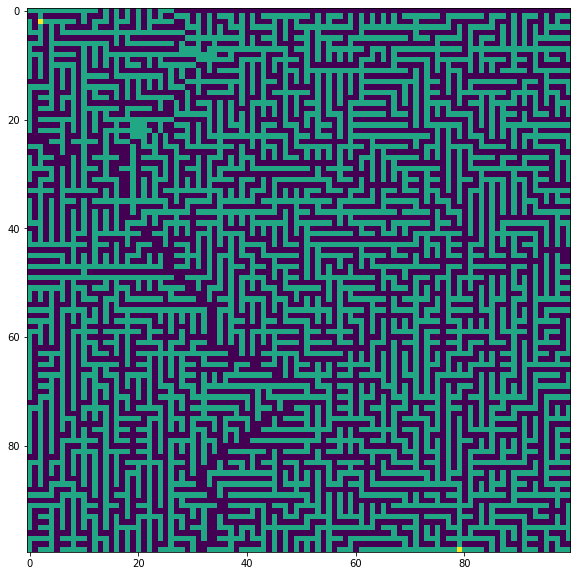

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
seed  = 106
np.random.seed(seed)
random.seed(seed)
terrain_seeds_total = 1000
terrain_seeds =  np.random.random((terrain_seeds_total))
count_t = 0
count_f = 0

x_max = 100
x_min = 0
y_max = 100
y_min = 0
size = 4
space = {}

maze_defs = []

maze_defs.append(MazeDef(id_=0, center =(2,2),tries=100))
maze_defs.append(MazeDef(id_=1, center =(35,35),tries=100))
maze_defs.append(MazeDef(id_=2, center =(49,10),tries=100))
maze_defs.append(MazeDef(id_=3, center =(1,49),tries=100))
maze_defs.append(MazeDef(id_=4, center =(99,79),tries=100))


points,branches = generate_maze(
                maze_defs,
                distance_range=(3,13),
                xrange=(0,x_max),yrange=(0,y_max),
                extra_growth=10000)

for (xx,yy), v in points.items():
    space[(xx,yy)]=0.6
        

space[(2,2)]=1
space[(99,79)]=1
        
# for (xx,yy), v in branches.items():
#     if v ==1:
#         space[(xx,yy)]=1

nspace = np.zeros((x_max,y_max))
for k,v in space.items():
    nspace[k[0],k[1]] = v
plt.figure(figsize=(10, 10))
plt.imshow(nspace, interpolation='nearest')
plt.show()


# Terrain

In [13]:
def generate_points(center_point, num_points=10,gap_range=(1,2), momentum = 0.7, spread = 0.8, val=0.05):
    points =  {}
    points[center_point] = val
    new_x,new_y = center_point
    direction = np.random.randint(8)
    for i in range(0,num_points):
        idx = np.random.randint(len(points))
        jump = np.random.randint(gap_range[0],gap_range[1])
        if random.random() > momentum:
            direction = np.random.randint(8)
        if random.random() > spread:
            new_x,new_y = list(points.keys())[idx*1%(idx+1)]
        if direction == 0:
            new_x,new_y = new_x + 0, new_y + jump
        elif direction == 1:
            new_x,new_y = new_x + 0, new_y + -jump
        elif direction == 2:
            new_x,new_y = new_x + -jump, new_y + 0
        elif direction == 3:
            new_x,new_y = new_x - jump, new_y + 0
        elif direction == 4:
            new_x,new_y = new_x + jump, new_y - jump
        elif direction == 5:
            new_x,new_y = new_x - jump, new_y + jump
        elif direction == 6:
            new_x,new_y = new_x + jump, new_y + jump
        elif direction == 7:
            new_x,new_y = new_x - jump, new_y - jump
        points[(new_x,new_y)] = min(points.get((new_x,new_y),0) + val,1)
    return points

In [ ]:
updates:2  center:Vec2d(144, -192)  view_width:284.44444444444446  background_center:Vec2d(144, -112) background_size:(853, 480)


In [169]:
def rand_int_from_coord(x,y,seed):
    v =  (x + y * seed ) % 12783723
    h = hashlib.sha1()
    h.update(str.encode(f"{v}"))
    return int(h.hexdigest(),16) % 172837

In [265]:
bx = 5
bw = 200

cx = -44
cw = 100



In [268]:
y_need_update = ((by - bh/2) >= (cy - ch/2)) or ((by+bh/2) <= (cy + ch/2))
y_need_update

NameError: name 'by' is not defined

In [269]:
x_need_update = ((bx - bw/2) >= (cx - cw/2)) or ((bx+bw/2) <= (cx + cw/2))
x_need_update

False

In [225]:
# px = ((cx + cw/2) - cx) - ((bx+bw/2) - bx)
# px

In [238]:
nx = (cx - cw/2) - (bx - bw/2)
nx

-5.0

In [226]:
nx = ((bx-bw/2) - bx) -  ((cx - cw/2) - cx)
nx

-50.0

In [168]:
rand_int_from_coord(1,2,1)

100575

In [78]:
def fill_space(space,
               terrain_seeds,
               seed_range=(1,0.998),
               num_points=np.random.randint(1000,4000),
               val = 0.3,
               spread=0.1,
               gap_range=(1,2),
               momentum=0.4):

    for x in range(0,x_max):
        for y in range(0,y_max):
            xx = x // size
            yy = (y // size) + 17 # Larger prime?
            idx = (xx*yy)%terrain_seeds_total
            xseed = terrain_seeds[idx]
            if xseed< seed_range[0] and  xseed>=seed_range[1]:
                # water
                
                points = generate_points(
                    center_point=(x,y),
                    num_points=num_points,
                    gap_range=gap_range,
                    momentum=momentum,
                    spread=spread,
                    val=val)

                for (xx,yy), v in points.items():
                    if (xx,yy) not in space and in_range(xx,0,x_max) and in_range(yy,0,y_max):
                        space[(xx,yy)]=val


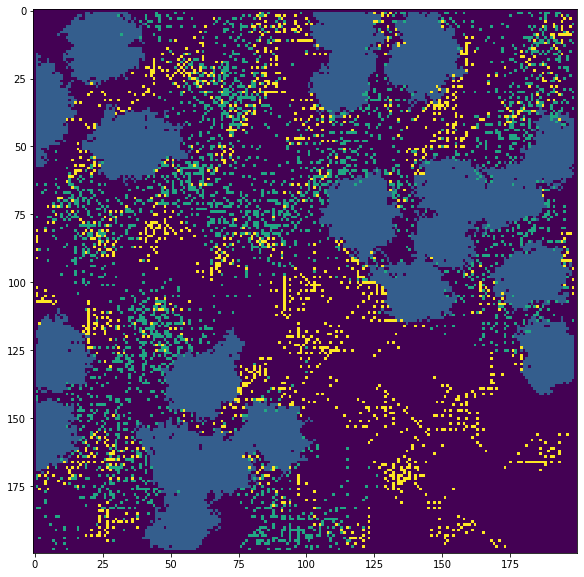

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random
seed  = 10
np.random.seed(seed)
random.seed(seed)
terrain_seeds_total = 1000
terrain_seeds =  np.random.random((terrain_seeds_total))
space = {}
fill_space(space,terrain_seeds,
           seed_range=(1,0.998),
           num_points=np.random.randint(1000,4000),
           val = 0.3,
           spread=0.1,
           gap_range=(1,2),
           momentum=0.4)
fill_space(space,terrain_seeds,
           seed_range=(0.998,0.997),
           num_points=np.random.randint(20,200),
           val = 0.6,
           spread=0.5,
           gap_range=(3,6),
           momentum=0.4)
fill_space(space,terrain_seeds,
           seed_range=(0.997,0.996),
           num_points=np.random.randint(10,50),
           val = 1,
           spread=0.5,
           gap_range=(2,4),
           momentum=0.6)
# fill_space(space,terrain_seeds,seed_range=(0.998,0.997),val = 0.6)
nspace = np.zeros((x_max,y_max))
for k,v in space.items():
    nspace[k[0],k[1]] = v
plt.figure(figsize=(10, 10))
plt.imshow(nspace, interpolation='nearest')
plt.show()